## The predicted effect of variants related to Schizophrenia

Using the GWAS catalog (https://www.ebi.ac.uk/gwas/home), we created a list of genes that have at least two variants related to schizophrenia in the input sequence (scz_final_filtered.csv). In the tutorial notebook, we explain how to predict the effect of mutations yourself. Here, we will just visualize the results.

In [1]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

matplotlib.rcParams['pdf.fonttype'] = 42


In [2]:
# Load the predicted effect
with open('../../Zenodo/human/M1/SCZ_subclass.pickle', 'rb') as f:
    scz_effect = pickle.load(f)

In [3]:
# Load the names etc. of the mutations
mut = pd.read_csv('../../Zenodo/human/M1/scz_final_filtered.csv', sep='\t')
mut['variant'] = ''

for i in range(len(mut)):
    mut['variant'][i] = mut['Variant and risk allele'][i].split('-')[0]

mut['gene-var'] = mut['Mapped gene'] + '-' + mut['variant']

C:\Users\LCMMIC~1\AppData\Local\Temp/ipykernel_20196/576477576.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mut['variant'][i] = mut['Variant and risk allele'][i].split('-')[0]


### Plot the predicted effect of all variants

In [4]:
cp = pd.read_csv('../../Zenodo/human/M1/subclass/subclass.csv', index_col=0).columns
ct_mapping = np.vstack([cp, cp, cp])
ct_mapping[0,:] = 'All'
ct_mapping[1,[0,1,11,12,13,18]] = 'Non-neuronal'
ct_mapping[1,[10,14,15,16,17,19]] = 'GABAergic'
ct_mapping[1,[2,3,4,5,6,7,8,9]] = 'Glutamatergic'

In [5]:
alphabet = 'ACTG'
ohdict = dict((i, c) for i, c in enumerate(alphabet))

effect_all = pd.DataFrame(data=np.zeros((2940, 5)), columns=['subclass', 'class', 'mutation', 'gene-variant', 'effect'])
effect_all = effect_all.astype({"subclass": str, "class": str, "mutation": str, "gene-variant": str})

count = 0

for i in range(49):
    for k in  range(4):
        
        if(np.sum(scz_effect[i], axis=0)[k]):
        
            for j in range(20):

                effect_all['gene-variant'][count] = mut['gene-var'][i]
                effect_all['subclass'][count] = ct_mapping[2,j]
                effect_all['class'][count] = ct_mapping[1,j]
                effect_all['mutation'][count] = ohdict[k]
                effect_all['effect'][count] = scz_effect[i,j,k]
                count += 1
            
            

C:\Users\LCMMIC~1\AppData\Local\Temp/ipykernel_20196/3418934988.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effect_all['gene-variant'][count] = mut['gene-var'][i]
C:\Users\LCMMIC~1\AppData\Local\Temp/ipykernel_20196/3418934988.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effect_all['subclass'][count] = ct_mapping[2,j]
C:\Users\LCMMIC~1\AppData\Local\Temp/ipykernel_20196/3418934988.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

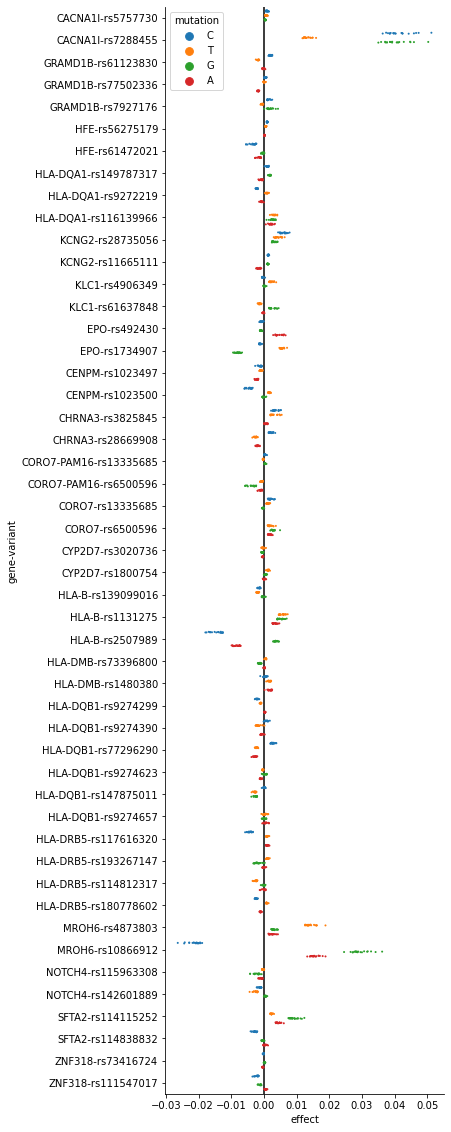

In [6]:
# Figure S14
plt.figure(figsize=[5,20])
plt.axvline(0, color='k')
sns.stripplot(data=effect_all, y='gene-variant', x='effect', hue='mutation', dodge=True, s=2, rasterized=True)
sns.despine()
plt.show()

### Zoom in on MROH6-rs10866912

In [7]:
mut_int = effect_all[effect_all['gene-variant'] == 'MROH6-rs10866912']
mut_int.iloc[:5]

,subclass,class,mutation,gene-variant,effect
2520,Astro,Non-neuronal,A,MROH6-rs10866912,0.016842
2521,Endo,Non-neuronal,A,MROH6-rs10866912,0.014083
2522,L2/3 IT,Glutamatergic,A,MROH6-rs10866912,0.014443
2523,L5 ET,Glutamatergic,A,MROH6-rs10866912,0.015388
2524,L5 IT,Glutamatergic,A,MROH6-rs10866912,0.014429


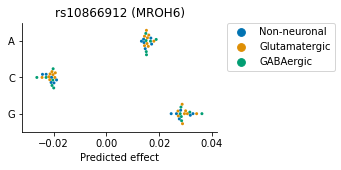

In [8]:
# Figure 4G
plt.figure(figsize=(3.5, 2))
sns.swarmplot(data=mut_int, x='effect', y='mutation', hue = 'class', size=3, palette='colorblind')
sns.despine()
plt.xlim([-0.032, 0.042])
plt.ylabel('')
plt.xlabel('Predicted effect')
plt.title('rs10866912 (MROH6)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
